In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils

plt.rcParams.update({"font.size": 9})

# preprocess dataframe
df196 = (
    utils.mat_to_pd("datasets/Rat196Vectors_241025.mat")
    .query("Valid == 1 and RT == RT")
    .assign(trialDate=lambda x: pd.to_datetime(x["trialDate"] - 719529, unit="D"))
    .set_index("trialDate")
    .sort_index()
    .assign(
        RT=lambda x: x["RT"] - x["RT"].min() + 1e-2,
        y=lambda x: x["RT"] * x["correct"].map({1: 1, 0: -1}),
        coh_bins=lambda x: pd.cut(x["coherence"], bins=5),
        day=lambda x: ((x.index - pd.Timedelta(hours=14)).floor("D") + pd.Timedelta(hours=14)),  # 2pm - 2pm
        hour=lambda x: x.index.hour + 1,
        minute=lambda x: x.index.minute + 1,
    )
)

df196.shape

(132743, 21)

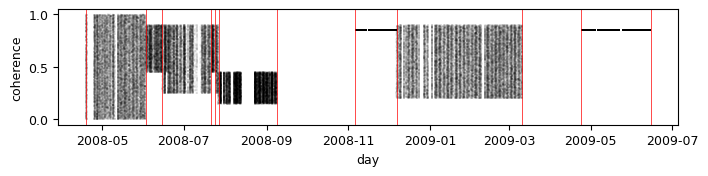

In [2]:
# coherence range by day

fig, ax = plt.subplots(figsize=(8, 1.5))
ax.scatter(df196.index, df196["coherence"], s=1, c="k", alpha=0.5, marker="_", lw=0.1)
ax.set_xlabel("day")
ax.set_ylabel("coherence")
for day in [
    "2008-04-19",
    "2008-06-03",
    "2008-06-15",
    "2008-07-21",
    "2008-07-24",
    "2008-07-27",
    "2008-09-09",
    "2008-11-06",
    "2008-12-07",
    "2009-03-11",
    "2009-04-24",
    "2009-06-15",
]:
    ax.axvline(pd.to_datetime(day), c="r", lw=0.5)

0.6428571043135866 1.3536112672543528


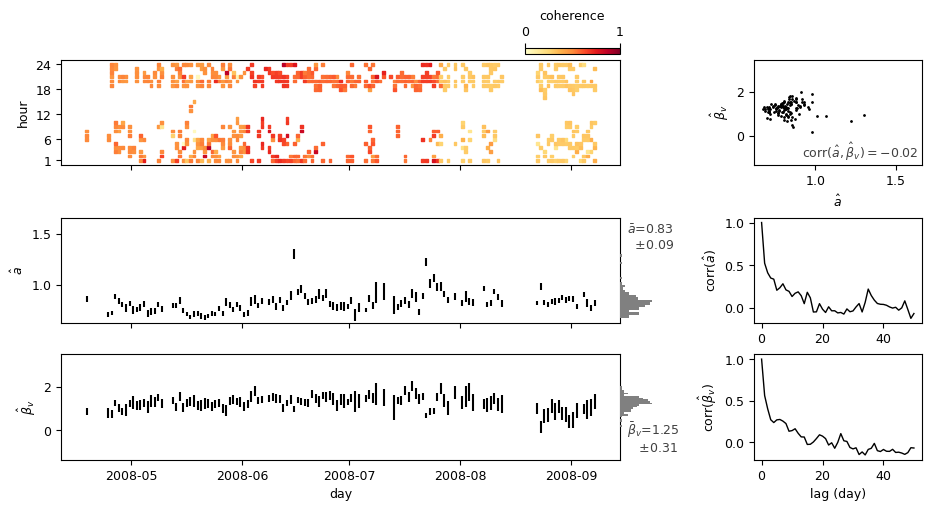

In [3]:
# fit by day, 24H sessions
df196_heatmap = df196.loc[:"2008-10"].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_day = utils.fit_ddm(df196.loc[:"2008-10"], "day")
print(df196_fit_by_day["a-"].min(), df196_fit_by_day["a+"].max())
utils.plot_heatmap_and_fits(
    df196_heatmap,
    df196_fit_by_day,
    x="day",
    y="hour",
    figsize=(9, 5),
)

0.6221965339826817 1.658881532198971


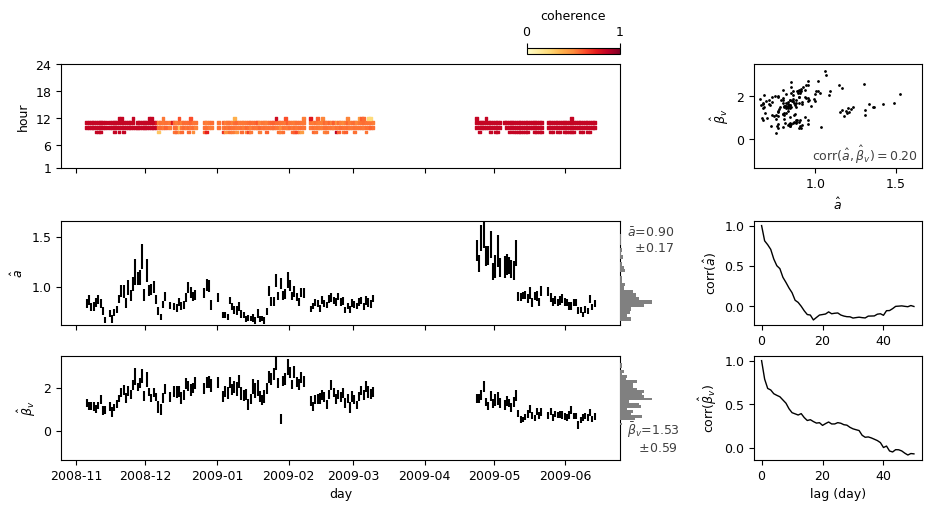

In [4]:
# fit by day, 4H sessions
df196_heatmap = df196.loc["2008-10":].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_day = utils.fit_ddm(df196.loc["2008-10":], "day")
print(df196_fit_by_day["a-"].min(), df196_fit_by_day["a+"].max())
utils.plot_heatmap_and_fits(
    df196_heatmap,
    df196_fit_by_day,
    x="day",
    y="hour",
    figsize=(9, 5),
)

0.6767064322593213 1.0429678258447797


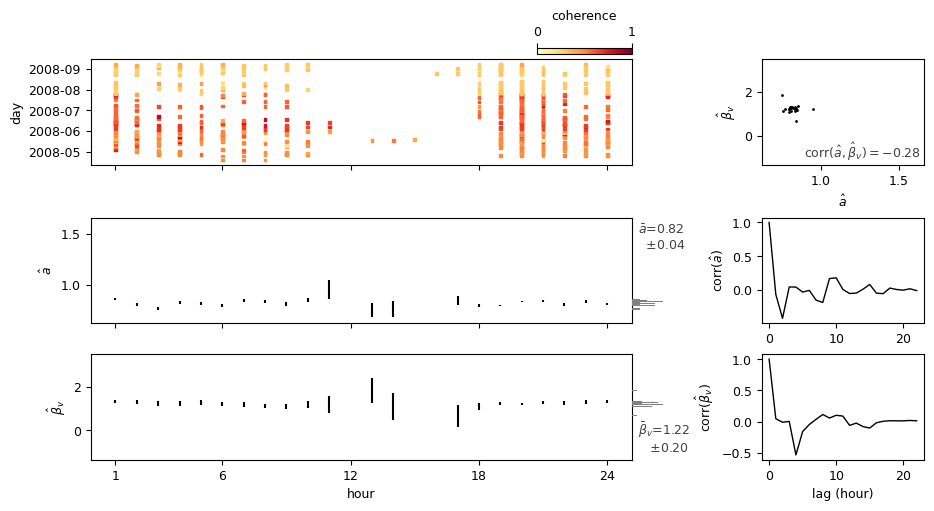

In [5]:
# fit by hour, 24H sessions
df196_heatmap = df196.loc[:"2008-10"].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_hour = utils.fit_ddm(df196.loc[:"2008-10"], "hour")
print(df196_fit_by_hour["a-"].min(), df196_fit_by_hour["a+"].max())
utils.plot_heatmap_and_fits(
    df196_heatmap,
    df196_fit_by_hour,
    x="hour",
    y="day",
    figsize=(9, 5),
)

0.7479668267402237 0.90592755184084


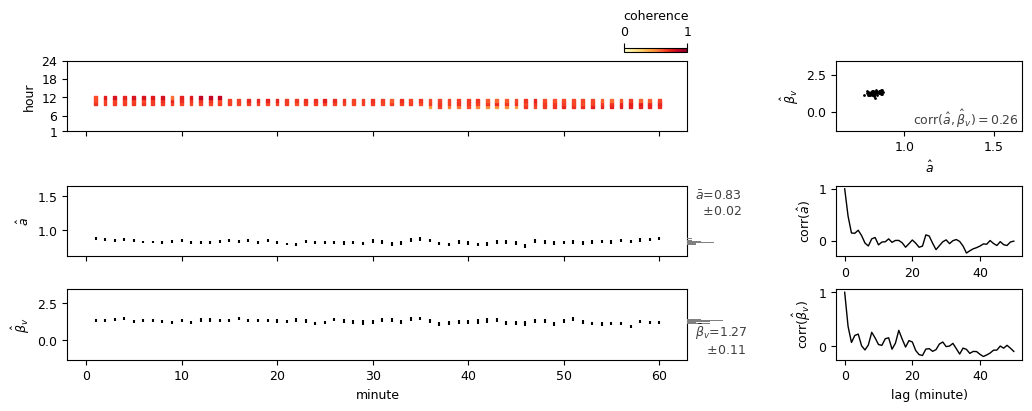

In [6]:
# fit by minute, 4H sessions
df196_heatmap = df196.loc["2008-10":].groupby(["hour", "minute"], as_index=False)["coherence"].mean()
df196_fit_by_minute = utils.fit_ddm(df196.loc["2008-10":], "minute")
print(df196_fit_by_minute["a-"].min(), df196_fit_by_minute["a+"].max())
utils.plot_heatmap_and_fits(
    df196_heatmap,
    df196_fit_by_minute,
    x="minute",
    y="hour",
    figsize=(10, 4),
)